# Probability distributions

Set Jupyter table style

In [24]:
%%html
<style>
table {margin-left: 20px !important;}
th {text-align: left !important;}
</style>

Import python modules

In [25]:
import matplotlib.pylab as plt
import numpy as np
from scipy import stats

### Table of Contents

I. [Background](#background)

II. [Discrete probability distributions](#discrete)

 | Distribution              | Parameters   | scipy.stats   |
 |:--------------------------|:------------:|:--------------|
 | [Binomial](#binom)        | n, p         | .binom        |
 | [Geometric](#geom)        | p            | .geom         |
 | [Hypergeometric](#hyperg) | M, n, N      | .hypergeom    |
 | [Poisson](#poisson)       | $\mu$        | .poisson      | 

III. [Continuous probability distributions](#continuous)

| Distribution              | Parameters   | scipy.stats   |
|:--------------------------|:------------:|:--------------|
| [Uniform](#uni)           |              |               |
| [Exponential](#expo)      | $\mu$        | .expon        |
| [Normal](#normal)         | $\mu, \sigma$| .norm         |
| [Student's t](#tdist)     | df           | .t            |

IV. [Common scipy.stats distribution methods](#scipy)

V. [Sources](#sources)

##  Background<a class="anchor" id="background"></a>

A **random variable** discribes all of the possible numerical outcomes of a random phenomenon.

A statistical experiment determines a specific value of a random variable which can chage on repitition of the experiment. A **probability distribution** gives all posssible values of a random variable and their corresponding probabilities.   

Uppercase X, Y denote random variables (description as text)
Lowercase x, y denote a value of a random variable (a given number)

## Discrete probability distributions <a class="anchor" id="discrete"></a>

A **probability mass function (pmf)** gives the probability of a discrete random variable for different exact values. Each probability is between 0 and 1, inclusive. The sum of the probabilities is 1. *Note: pmfs are also sometimes called probability distribution functions which gives the same acronym used for probability density functions (pdf), the analogous functions of continous probability distributions.* 

A **cumulative distribution function (cdf)** gives the probability that a random variable is less than or equal to a given value.

### Binomial  <a class="anchor" id="binom"></a> 

X ~ B(n, p)<br>

A discrete random variable that gives the distribution of the number of successes in **n** independent and identically distributed Bernoulli trials with probability of success **p**

In [33]:
# Mean and variance 
#   Illowsky - example 4.15 part b 
n = 200
p = 0.0128
mean, var = stats.binom.stats(n, p)
mean_formula = n * p
std_dev = np.sqrt(var)
std_dev_formula = np.sqrt(n * p * (1 - p)) 
print('mean = {0} (calculated by scipy)'.format(mean))
print('mean = {0} (calculated as n * p)'.format(mean_formula))
print('standard_deviation:{0:.4f} (calculated from scipy variance)'.format(std_dev))
print('standard_deviation:{0:.4f} (calculated as (sqrt(npq)))'.format(std_dev_formula))

mean = 2.56 (calculated by scipy)
mean = 2.56 (calculated as n * p)
standard_deviation:1.5897 (calculated from scipy variance)
standard_deviation:1.5897 (calculated as (sqrt(npq)))


In [37]:
# Cumulative density function and Probability mass function 
#   Illowsky - example 4.15 part c and d
n = 200
p = 0.0128

x = 8
print('probability of {0} or less successes = {1:.4f}'.format(x, stats.binom.cdf(x, n, p))) # prob <= x

for x in [5, 6]:
    print('probability of exactly {0} successes = {1:.4f}'.format(x, stats.binom.pmf(x, n, p))) # prob = x

probability of 8 or less successes = 0.9988
probability of exactly 5 successes = 0.0707
probability of exactly 6 successes = 0.0298


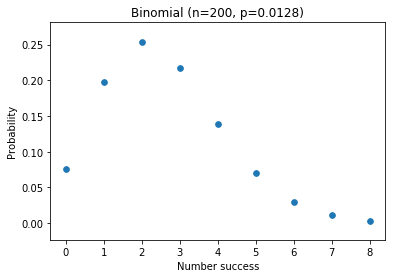

In [66]:
# Graph binomial 
#   Illowsky - example 4.15
n = 200
p = 0.0128

# x = np.arange(0, n) # entire range not practile
# Instead chose range within some probability threshold
x = np.arange(stats.binom.ppf(0.001, n, p), stats.binom.ppf(0.999, n, p))

plt.figure()
plt.scatter(x, stats.binom.pmf(x, n, p), s=32)
plt.title('Binomial (n={0}, p={1})'.format(n, p))
plt.xlabel('Number success')
plt.ylabel('Probability')
plt.show()
plt.close()

In [73]:
# Generate random numbers from binomial
n = 200
p = 0.0128
r = stats.binom.rvs(n, p, size=20)
print(r)

[3 2 3 4 0 4 1 3 4 2 2 3 2 3 2 1 4 2 1 1]


### Geometric <a class="anchor" id="geom"></a>

X ~ G(p)

A discrete random variable that gives the distribution of the number of independent trials before the first success occurs given independent Bernoulli trials with constant probability of success **p**. 

In [5]:
p = 0.35
mean, var = stats.geom.stats(p)
print('{0:.3f} {1:.3f}'.format(float(mean), np.sqrt(var)))

2.857 2.304


In [6]:
p = 0.35
n = 3
print(stats.geom.pmf(n, p))  # Probability first failure occurs at n
print(stats.geom.cdf(n, p))  # Probability first failure occurs in n

0.147875
0.725375


### Hypergeometric <a class="anchor" id="hyperg"></a>

X ~ H(M, n, N)

A discrete random variable that gives the distribution of the number of individuals from a subgroup expected in a sample taken without replacement.

Scipy notation: p(k, M, n, N). *Alternative notations are common* <br>
**k** = number of objects drawn from subgroup of interest (generally interested in p(k, M, n, N) vs. k) <br>
**M** = number of objects in population <br>
**n** = number of objects in subgroup of interest in the population <br>
**N** = sample size (number of objects draw without replacement)


In [7]:
M = 100
n = 18 
N = 10  
mean, var = stats.hypergeom.stats(M, n, N)
print('{0:.3f} {1:.3f}'.format(float(mean), np.sqrt(var))) # Expected value from group n

1.800 1.158


In [8]:
x = 2
print(stats.hypergeom.pmf(x, M, n, N))  # Probability drew exactly x 
print(stats.hypergeom.cdf(x, M, n, N))  # Probability drew <= x

0.31502296054685713
0.743335223971568


### Poisson<a class="anchor" id="poisson"></a>

X ~ P($\mu$)

Probability of a number of occurances of a discrete, independent event given the average rate of that event. Generally notated as $\mu$ or $\sigma$. Note: the interval is defined by $\mu$ (i.e. per day vs. per year)   

[0.1353352832366127, 0.2706705664732254, 0.2706705664732254, 0.1804470443154836, 0.0902235221577418]


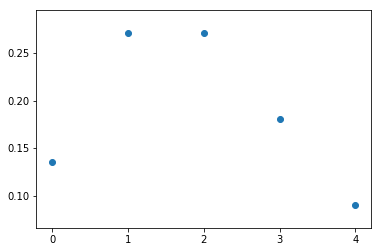

In [9]:
k_range = range(5)     #  list of k (numer of events) to look at
lamb = 2               #  (events per interval (i.e. 1 per 100 years))

p_k = [((np.e ** -lamb) * (lamb ** k)) / np.math.factorial(k) for k in k_range]

print(p_k)

plt.figure()
plt.scatter(k_range, p_k)
plt.xticks(k_range)
plt.show()
plt.close()

In [10]:
mu = 3  # rate of occurance (i.e. 0.75 per 15 min)
mean, var = stats.poisson.stats(mu)
std_dev = np.sqrt(var)
print('mean:{0} \nstandard_deviation:{1:.4f}'.format(mean, std_dev))

mean:3.0 
standard_deviation:1.7321


In [11]:
mu = 32

print(stats.poisson.cdf(4, mu)) # prob <= x
print()

print(stats.poisson.pmf(5, mu)) # prob = x
print(1 - stats.poisson.cdf(40, mu)) # prob = x

6.293710352933338e-10

3.541157347948532e-09
0.07066085287803281


## Continuous probability distributions <a class="anchor" id="continuous"></a>

### Uniform<a class="anchor" id="uni"></a>

### Exponential<a class="anchor" id="expo"></a>

In [12]:
mu = 23

mean, var, skew, kurt = stats.expon.stats(scale = mu, moments='mvsk')
std_dev = np.sqrt(var)
print('mean:{0} \nstandard_deviation:{1:.4f}'.format(mean, std_dev))

mu = 22
x = 20
print(stats.expon.pdf(x, scale = mu)) # prob = x
print(stats.expon.cdf(x, scale = mu)) # prob <= x
#print(stats.expon.cdf(5, scale = mu)) # prob <= x
print()
#print(stats.expon.ppf(0.5, scale = mu)) # prob <= x

mean:23.0 
standard_deviation:23.0000
0.01831319643314241
0.5971096784708669



### Normal<a class="anchor" id="normal"></a>

In [13]:
mu = 36.9
sigma = 13.9
x = 23
x2 = 64.7
per = 0.90 # percentile
print(stats.norm.cdf(x2, mu, sigma) - stats.norm.cdf(x, mu, sigma))
print(stats.norm.ppf(per, mu, sigma)) #  Inverse of cdf
print()

# Confidence interval bounds in SDs
  # note, techincally requires known population SD to apply

# z-scores (multiple by standard error of the mean)
print(stats.norm.ppf(0.025, 0, 1)) # lower bound z-score
print(stats.norm.ppf(0.975, 0, 1)) # upper bound z-score

# or go straight to getting bounds with .interval
x_bar = 1.024
sigma = 0.337
n = 30
print(stats.norm.interval(0.98, x_bar, (sigma / np.sqrt(n)))) 

0.8185946141203637
54.71356676106994

-1.9599639845400545
1.959963984540054
(0.8808656297226961, 1.1671343702773038)


In [14]:
# n required for desired confidence and bounds of mean
ebm = 2
conf = 0.95
sigma = 15

alpha = (1 - conf)
z = (stats.norm.ppf((alpha / 2), 0, 1)) 
n = np.ceil((z ** 2 * sigma ** 2) / (ebm ** 2))
print(n)

217.0


In [15]:
# confidence interval of a proprotion
#  not using +4 method here (see below)

n = 500
p = 421 / n
cl = 0.95

alpha = 1 - cl
z_lower = stats.norm.ppf(alpha / 2)
z_upper = stats.norm.ppf(1 - (alpha / 2))

s = np.sqrt((p * (1 - p)) / n)

ebp = z_upper * s

print(p - ebp, p + ebp)

print(stats.norm.interval(cl, p, s))

0.8100296288520179 0.873970371147982
(0.8100296288520179, 0.873970371147982)


In [16]:
# confidence interval of a proprotion
#  using +4 method here

n = 25     # number of samples
pn = 6     # number of successes
cl = 0.95  # confidence level

n += 4     # applying +4 method
p = (pn + 2) / n   # probability of success, applying +4 method

alpha = 1 - cl
z_lower = stats.norm.ppf(alpha / 2)
z_upper = stats.norm.ppf(1 - (alpha / 2))

s = np.sqrt(p * (1 - p) / n)

ebp = z_upper * s

print(p - ebp, p + ebp)

print(stats.norm.interval(cl, p, s))


0.11319271756780241 0.43853142036323206
(0.11319271756780241, 0.43853142036323206)


In [17]:
# n required for desired confidence and bounds of proportion
ebm = 0.03
conf = 0.90

alpha = (1 - conf)
z = (stats.norm.ppf((alpha / 2), 0, 1))
n = np.ceil((z ** 2 * 0.25) / (ebm ** 2))
print(n)

752.0


### Students t <a class="anchor" id="tdist"></a>

In [18]:
data = [8.6, 9.4, 7.9, 6.8, 8.3, 7.3, 9.2, 9.6, 8.7, 11.4, 10.3, 5.4, 8.1, 5.5, 6.9]
cl = 0.95

mu = np.mean(data) # sample mean
s = np.std(data, ddof=1) # sample standard deviation
n = len(data)
print(n, mu, s)

alpha = 1 - cl
t_lower = (stats.t.ppf((alpha / 2), n - 1)) 
t_upper = (stats.t.ppf((1 - (alpha / 2)), n - 1)) 
ebm = t_upper * (s / np.sqrt(n))
print(mu - ebm, mu + ebm)

print(stats.t.interval(1 - alpha, n - 1, loc=mu, scale=(s / np.sqrt(n))))


15 8.226666666666667 1.6722383060978339
7.300611959652363 9.15272137368097
(7.300611959652363, 9.15272137368097)


In [19]:
data = [ 79, 145, 147, 160, 116, 100, 159, 151, 156, 126,
        137,  83, 156,  94, 121, 144, 123, 114, 139,  99]
cl = 0.90

n = len(data)
mu = np.mean(data) # sample mean
s = np.std(data, ddof=1) # sample standard deviation
print(n, mu, s)

alpha = 1 - cl
t_lower = stats.t.ppf((alpha / 2), n - 1)
t_upper = stats.t.ppf((1 - alpha / 2), n - 1)
ebm = t_upper * (s / np.sqrt(n))
print(mu - ebm, mu + ebm)

print(stats.t.interval(cl, n - 1, loc=mu, scale=(s / np.sqrt(n))))

20 127.45 25.964500055997508
117.41093378346815 137.48906621653185
(117.41093378346815, 137.48906621653185)


## Common scipy .stats distribution methods<a class="anchor" id="scipy"></a>

| method    | input\* | returns                                                 |
|:----------|:-------:|:--------------------------------------------------------|
| .stats    |         | mean, standard_dev, skew, kurtosis                      |
| .pmf      | x       | probability mass function (discrete distributions)      | 
| .pdf      | x       | probability density function (continuous distributions) |               
| .cdf      | x       | cumulative density function / tail left of x            |
| .sf       | x       | (1 - cumulative density function) / tail right of x     |
| .ppf      | q       | percent point function (inverse of cdf)                 |
| .interval | $\alpha$| confidence interval                                     |
| .rvs      |         | generate random numbers from distribution               |

>\* input typically includes distribution parameters as well

## Sources<a class="anchor" id="sources"></a>

Illowsky, Barbara; Dean, Susan. Introductory Statistics. OpenStax College. Kindle Edition
https://openstax.org/details/introductory-statistics

SciPy 1.0.0 Release Notes: https://docs.scipy.org/doc/scipy/reference/index.html